## Here In This Notebook there are the implementation of the Naive Bayesian Classifier and the Logistic Regressor for the Multi Class Classification on the K-MNIST Dataset.

Assignment-1
P4
a)

In [ ]:
import numpy
from numpy import *
import matplotlib.pyplot as plot

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Making the Data to be Ready

In [ ]:
data_raw=genfromtxt("/content/drive/MyDrive/Data/PRNN/Assignment_1/Kannada-MNIST/train.csv",delimiter=",")

In [ ]:
X_raw,Y_raw=data_raw[1:,1:],data_raw[1:,0]
X_raw=X_raw/255
Y_raw=Y_raw.astype(int)
N,d=shape(X_raw)
print(N,d)

60000 784


In [ ]:
Ns=6000  #samples_of_choice

random_index=random.choice(arange(N),Ns)

In [ ]:
Y_raw

array([0, 1, 2, ..., 7, 8, 9])

In [ ]:
X_raw[random_index].shape

(6000, 784)

In [ ]:
noise = random.rand(Ns,d)
X_raw=X_raw[random_index]+0.1*noise
Y_raw=Y_raw[random_index]

In [ ]:
X1=(X_raw[0,:])#+0.1*noise[0,:]

#X1=X_raw[0,:].astype(int)
X1/255
X1.shape

#plot.imshow(resize((X1/255),(28,28)),cmap="gray")

(784,)

In [ ]:
train_test_split_ratio=0.9
train_split=train_test_split_ratio*float(Ns)
test_split=round((1-train_test_split_ratio)*float(Ns))

In [ ]:
# train_index=random.choice(arange(N),int(train_split))
# train_index.shape
# test_index=
test_split

600

In [ ]:
train_X,train_Y=X_raw[0:int(train_split)],Y_raw[0:int(train_split)]
test_X,test_Y=X_raw[Ns-int(test_split):Ns],Y_raw[Ns-int(test_split):Ns]

In [ ]:
test_Y

In [ ]:
K=10
labels=array([range(0,K)])
C=[]
X_tr=[]
for j in range(K):

  C_j=where(train_Y==j)         #set of indexes where a particular class Y==j
  c_j=len(C_j[0])                  #Cardinality of that set
  C.append(c_j)
  X_tr.append(train_X[C_j,:])
C_j
numpy.sum(C)

5400

In [ ]:
X_train=X_tr

In [ ]:
X_train[0].shape
X_train[0][0]
Xk=reshape(X_train[0][0][1],(1,d))
Xk.shape
# for j in range(10):
#   print(j)
#   j=j+1
# j

(1, 784)

In [ ]:
X_train[0][0][0].shape

(784,)

## Calculating the Sample Means and Sample Covariances for each of the classes

In [ ]:
def SecondOrderStatistics(training_data):

  Sample_mean=[]
  Sample_covariances=[]
  sum1,sum2=0,0

  for j in range(K):
    for jj in range(C[j]):
      X_i=reshape(training_data[j][0][jj],(1,d))
      sum1=sum1+(X_i)
    Sample_mean.append(sum1/C[j])
    sum1=0
    for ii in range(C[j]):
      X_ii=reshape(training_data[j][0][ii],(1,d))
      sum2=sum2+(X_ii-Sample_mean[j]).T * (X_ii-Sample_mean[j])
    Sample_covariances.append(sum2/C[j])
    sum2=0
  return Sample_mean,Sample_covariances

#Basically building the Multivariate Gaussians for each classes

In [ ]:
Sample_mean,Sample_covariances = SecondOrderStatistics(X_train)
Sample_mean,Sample_covariances=array(Sample_mean),array(Sample_covariances)
print(Sample_mean.shape,Sample_covariances.shape)

(10, 1, 784) (10, 784, 784)


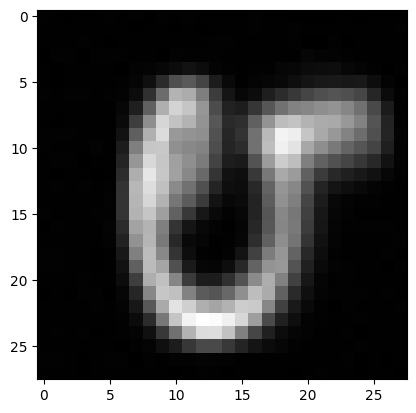

In [ ]:
plot.imshow(reshape(Sample_mean[random.choice(10,1)],(28,28)),cmap="gray")

In [ ]:
X_train[0][0][0][0].shape
X_train[0].shape

(1, 548, 784)

Since we are building the Naive Bayes Classifier, we take all our pixels to be independent and that's why our covariance matrix will be diagonal, and , here is the code for the same

In [ ]:
def NaiveCovarianceMatrix(training_data,sample_mean):
  naive_covariance_mat=[]
  #temp=zeros((d,d))
  for j in range(K):
    X_mi=training_data[j]
    sum=0
    temp=zeros((d,d))
    for m in range(d):
      sum=dot((X_mi[0,:,m].reshape(1,C[j])-sample_mean[j,0,m]),(X_mi[0,:,m].reshape(C[j],1)-sample_mean[j,0,m]))
      temp[m,m]=sum/C[j]
    naive_covariance_mat.append(temp)
  return naive_covariance_mat

In [ ]:
naive_covariance_mat = NaiveCovarianceMatrix(X_train,Sample_mean)
naive_covariance_mat=array(naive_covariance_mat)
naive_covariance_mat.shape

(10, 784, 784)

In [ ]:
naive_covariance_mat.shape

(10, 784, 784)

In [ ]:
diag=[]

for j in range(K):
  for m in range(d):
    diag.append(naive_covariance_mat[j,m,m])
diag=array(diag)
diag=diag.reshape(10,1,784)
diag[0]
diag[0].shape



(1, 784)

In [ ]:
test_X[0,:].shape

(784,)

Since, the dimension is large det(naive_covariance_mat) = 0,
and hence, we go by taking the log of the likelyhood so that the log(det(naive_covariance_mat)) = numpy.sum(log(diag))

In [ ]:
def loglikelyhoods(testing_data,sample_mean,naive_covariance_matrix):
  log_likelyhood_mat=zeros((K,int(testing_data.shape[0])))
  constant=-(testing_data.shape[1]/2)*log(2*pi)
  diag=[]

  for j in range(K):
    for m in range(testing_data.shape[1]):
      diag.append(naive_covariance_matrix[j,m,m])
  diag=array(diag)
  diag=diag.reshape(K,1,testing_data.shape[1])
  for j in range(K):
    for m in range(int(test_split)):
      x_m=reshape(testing_data[m,:],(1,testing_data.shape[1]))
      log_likelyhood_mat[j,m]=(constant+((-1/2)*numpy.sum(log(diag[j])))-
       ((testing_data[m,:].reshape(1,testing_data.shape[1])-Sample_mean[j]) @ linalg.inv(naive_covariance_mat[j]) @ (testing_data[m,:].reshape(testing_data.shape[1],1)-Sample_mean[j].reshape(testing_data.shape[1],1))))
  return log_likelyhood_mat

In [ ]:
c=0
for i in range(d):
  for j in range(d):
    if i==j and naive_covariance_mat[3,i,j]!=0:
     c=c+1
print(c)

784


Testing our Data!!!

In [ ]:
log_likelihood_mat = loglikelyhoods(test_X,Sample_mean,naive_covariance_mat)
y_pred=[]
for j in range(int(test_split)):
  m_index=where(log_likelihood_mat[:,j]==max(log_likelihood_mat[:,j]))
  y_pred.append(array(m_index))
y_pred=array(y_pred)


In [ ]:
print(y_pred.shape,shape(test_Y))


(1000, 1, 1) (1200,)


In [ ]:
c=0
for i in range(int(test_split)):
  if y_pred[i]-test_Y[i]!=0:
    c=c+1
accuracy=(1-(c/test_split))*100
print("accuracy:",accuracy)

accuracy: 89.0


In [ ]:
shape(labels)

(1, 10)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mattrix=confusion_matrix(y_pred[:,:,0],test_Y)
confusion_mattrix

array([[66,  1,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 63,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  4,  0, 43,  3,  3,  2,  9,  0,  0],
       [ 0,  2,  0,  3, 42,  2,  0,  1,  0,  1],
       [ 4,  2,  0,  2,  3, 60,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 50,  7,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  5, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 51,  1],
       [ 0,  0,  0,  0,  1,  0,  1,  0,  0, 63]])

#Sampling from the Estimated Distributions:
To demonstrate its Generative Nature.

Since, we have assumed the distributions and have got the Parameters by ML estimate , now our this model can gererate the samples.!!!

In [ ]:
#Sample from the Estimated Gaussian
x = random.multivariate_normal(mean = Sample_mean[1][0], cov = Sample_covariances[1])

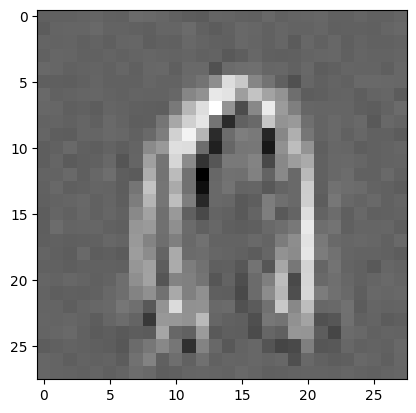

In [ ]:
plot.imshow(x.reshape(28,28),cmap = "gray")
plot.show()

b) Logistic Regression With Gradient Descent

In [ ]:
X_raw,Y_raw=data_raw[1:,1:],data_raw[1:,0]
X_raw,Y_raw=X_raw/255, Y_raw.astype(int)
N,d=shape(X_raw)

In [ ]:
labels=unique(Y_raw)
labels.shape

(10,)

In [ ]:
Ns=10000
random_samples=random.choice(arange(N),Ns)

In [ ]:
X_raw1,Y_raw1=X_raw[random_samples],Y_raw[random_samples]

In [ ]:
Y_raw1.shape

(10000,)

In [ ]:
train_test_split_ratio=0.9

train_split=int(train_test_split_ratio*Ns)
test_split=int(Ns-train_split)

In [ ]:
train_split

9000

In [ ]:
print(X_raw1.shape)
bias_vector=ones((Ns,1))
X_raw2=concatenate((X_raw1,bias_vector),axis=1)


X_raw2.shape
X_train,X_test=X_raw2[0:train_split],X_raw2[Ns-test_split:Ns]

X_train.shape,X_test.shape

(10000, 784)


((9000, 785), (1000, 785))

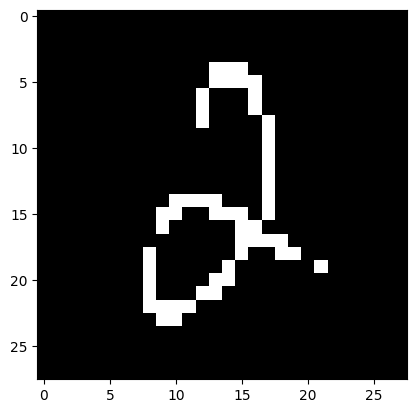

In [ ]:
plot.imshow(X_train[0,0:d].reshape(28,28),cmap="gray")#.shape

In [ ]:
Y_raw_onehot=zeros((Ns,len(labels)),int)

for j in (labels):
  for i in range(Ns):
    if Y_raw1[i]==j:
      Y_raw_onehot[i,j]=1



In [ ]:
Y_raw_onehot[1]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
Y_train,Y_test=Y_raw_onehot[0:train_split],Y_raw_onehot[train_split:Ns]

In [ ]:
W=ones((len(labels),d+1))


In [ ]:
Z=zeros((len(labels),train_split))

for j in (labels):
  for i in range(train_split):
    Z[j,i]=dot(W[j,:].reshape(1,d+1),X_train[i,:].reshape(d+1,1))


In [ ]:
dot(W[3,:].reshape(1,d+1),X_train[0,:].reshape(d+1,1))

array([[56.]])

In [ ]:
numpy.sum(exp(Z[:,0]))

2.091659496012996e+25

In [ ]:
H=zeros((len(labels),train_split))

for i in range(train_split):
  for j in (labels):
    H[j,i]=exp(Z[j,i])/numpy.sum(exp(Z[:,i]))


In [ ]:
H

array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

In [ ]:
array_0=[0,1]#,9,8]

H[:,array_0]

array([[0.1, 0.1],
       [0.1, 0.1],
       [0.1, 0.1],
       [0.1, 0.1],
       [0.1, 0.1],
       [0.1, 0.1],
       [0.1, 0.1],
       [0.1, 0.1],
       [0.1, 0.1],
       [0.1, 0.1]])

In [ ]:
numpy.sum(H[:,0])

1.0

In [ ]:
def empirical_risk(Y,LOGH):
  sum=0

  for i in range(train_split):

    sum=sum-dot(reshape(Y_train[i,:],(1,len(labels))),reshape(log(H[:,i]),(len(labels),1)))

  return sum

In [ ]:
risk=empirical_risk(Y_train,H)

In [ ]:
risk

array([[20723.26583695]])

In [ ]:
def gradient(X_train,Y_train,W_vector,H,m):
  train_split=len(X_train[:,0])
  sum=0

  for i in range(train_split):
    h_mat=zeros((len(labels),d+1))
    # sum=0

    for j in (labels):
      if j!=m :
        h_mat[j,:]=X_train[i,:]*H[m,i]
      elif j==m:
        h_mat[j,:]=X_train[i,:]*(H[m,i]-1)
    sum = sum +dot(Y_train[i,:].reshape(1,len(labels)),h_mat)

  return sum




def stochastic_gradient(H,number_of_samples):

  iterations=1000
  Batch=number_of_samples
  # X_Batch=X_train[Batch]
  # H_Batch=H
  Ones=ones((len(Batch),1))

  for i in range(1000):
    sum1,sum2=0,0
    for b in (Batch):
      sum1=sum1+X_train[b]*(1-H[b])
    sum2=sum2+sum1

  return sum2/1000





In [ ]:
W=ones((len(labels),d+1))

Z=zeros((len(labels),train_split))

for j in (labels):
  for i in range(train_split):
    Z[j,i]=dot(W[j,:].reshape(1,d+1),X_train[i,:].reshape(d+1,1))

H=zeros((len(labels),train_split))

for i in range(train_split):
  for j in (labels):
    H[j,i]=exp(Z[j,i])/numpy.sum(exp(Z[:,i]))



alpha=0.0001  #Learning Rate:

for ii in range(10000):

  # if ii==0:
  #risk_old=risk

  risk_old=empirical_risk(Y_train,H)
  # random_samps=random.choice(arange(train_split),100)
  for m in (labels):
    W[m,:]=W[m,:].reshape(1,d+1)-alpha*gradient(X_train,Y_train,W[j,:].reshape(1,d+1),H,m)
  # if ii==0:
  #   break



  # if ii==0:
  #   print(Z)
  for jj in ((labels)):
    for iii in range(train_split):
      Z[jj,iii]=dot(W[jj,:].reshape(1,d+1),X_train[iii,:].reshape(d+1,1))

  # if ii==0:
  #   print(H)
  for jjj in ((labels)):
    for iiii in range(train_split):
      H[jjj,iiii]=exp(Z[jjj,iiii])/numpy.sum(exp(Z[:,iiii]))
  # if ii==0:
  #   print(H)

  # # if ii==0:
  # #  risk_old=risk
  # if ii==0:
  #   print(risk_old)
  risk_new=empirical_risk(Y_train,H)
  print(risk_old,risk_new)
  # if ii==0:
  #   print(risk_new)
  if abs(risk_new-risk_old)<=10**-1:# or ii==5:
    break
print(ii)


[[20723.26583695]] [[15004.11829466]]
[[15004.11829466]] [[11442.73106023]]
[[11442.73106023]] [[9288.61906547]]
[[9288.61906547]] [[7916.65967663]]
[[7916.65967663]] [[6982.98349486]]
[[6982.98349486]] [[6309.30687567]]
[[6309.30687567]] [[5799.5230566]]
[[5799.5230566]] [[5398.930156]]
[[5398.930156]] [[5074.58365687]]
[[5074.58365687]] [[4805.608897]]
[[4805.608897]] [[4578.17925798]]
[[4578.17925798]] [[4382.78201585]]
[[4382.78201585]] [[4212.65621026]]
[[4212.65621026]] [[4062.86043413]]
[[4062.86043413]] [[3929.69481743]]
[[3929.69481743]] [[3810.33027502]]
[[3810.33027502]] [[3702.5634617]]
[[3702.5634617]] [[3604.6504349]]
[[3604.6504349]] [[3515.19102461]]
[[3515.19102461]] [[3433.04671969]]
[[3433.04671969]] [[3357.28122564]]
[[3357.28122564]] [[3287.11668235]]
[[3287.11668235]] [[3221.90090617]]
[[3221.90090617]] [[3161.08252838]]
[[3161.08252838]] [[3104.19187995]]
[[3104.19187995]] [[3050.82611881]]
[[3050.82611881]] [[3000.63753154]]
[[3000.63753154]] [[2953.32423947]]
[

KeyboardInterrupt: ignored

In [ ]:
 W[0]
 risk_new
 Z
 H

array([[4.17386165e-03, 2.77154786e-04, 5.68452416e-02, ...,
        1.99406672e-05, 3.97649958e-01, 1.57311536e-03],
       [5.98051854e-02, 6.06736444e-05, 9.38636575e-01, ...,
        6.76623991e-05, 1.43019306e-02, 9.91812804e-03],
       [5.98543103e-02, 4.78497526e-04, 8.29419780e-04, ...,
        7.95412652e-05, 2.99849502e-02, 2.15522040e-03],
       ...,
       [1.14531093e-02, 4.24324200e-02, 2.65239095e-04, ...,
        9.82933187e-01, 7.25966456e-02, 3.10607058e-01],
       [2.98165747e-03, 9.49332081e-05, 1.65693691e-03, ...,
        1.70303415e-06, 3.10180134e-02, 4.94011062e-04],
       [1.92086675e-03, 6.11572141e-04, 6.56102166e-05, ...,
        6.62194636e-05, 2.57580511e-02, 9.33040717e-04]])

In [ ]:
y_pred=[]

for i in range(train_split):
  max_index=where(H[:,i]==max(H[:,i]))
  y_pred.append(int(array((max_index))))

In [ ]:
Z_test=zeros((len(labels),test_split))

for i in range(test_split):
  for j in (labels):
    Z_test[j,i]=dot(W[j,:].reshape(1,d+1),X_test[i,:].reshape(d+1,1))


In [ ]:
H_test=zeros((len(labels),test_split))

for i in range(test_split):
  for j in (labels):
    H_test[j,i]=exp(Z_test[j,i])/sum(exp(Z_test[:,i]))


In [ ]:
y_pred=[]

for i in range(test_split):
  max_index=where(H_test[:,i]==max(H_test[:,i]))
  y_pred.append(max_index)


y_pred=array(y_pred)
y_pred[2]
Y_test=Y_raw1[Ns-test_split:Ns]

In [ ]:
y_pred[:,0,0]-Y_test
Y_test.shape
y_pred[:,0,0].shape

(1000,)

In [ ]:
c=0

for i in range(test_split):
  if y_pred[i,0,0]-Y_test[i]!=0:
    c=c+1

accuracy=(1-c/Ns)*100
accuracy

99.42